## Discussion Related With Outliers And Impact On Machine Learning!!

#### Which Machine LEarning Models Are Sensitive To Outliers?
1. Naivye Bayes Classifier--- Not Sensitive To Outliers
2. SVM--------                Not Sensitive To Outliers          
3. Linear Regression----------  Sensitive To Outliers
4. Logistic Regression-------   Sensitive To Outliers
5. Decision Tree Regressor or Classifier---- Not Sensitive
6. Ensemble(RF,XGboost,GB)------- Not Sensitive
7. KNN--------------------------- Not Sensitive 
8. Kmeans------------------------ Sensitive
9. Hierarichal------------------- Sensitive 
10. PCA-------------------------- Sensitive 
11. Neural Networks-------------- Sensitive


## Methods to Reduce:
    1) use ensemble techniques as these are robust to outliers..
    2) Metrics: Use ``MAE`` instead of ``RMSE`` as a loss function for regression type algorithms.
            

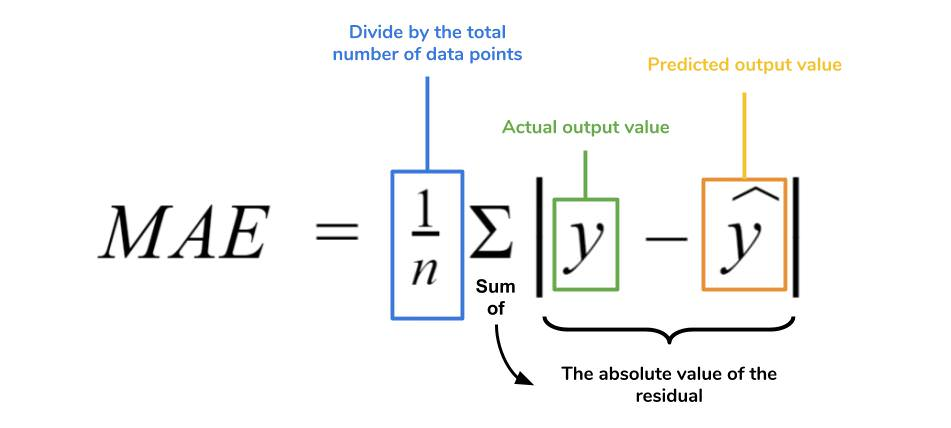

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Age'].isnull().sum()

177

In [4]:
import seaborn as sns

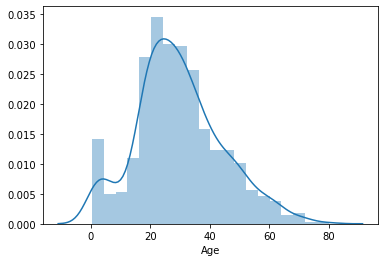

In [5]:
sns.distplot(df['Age'].dropna())

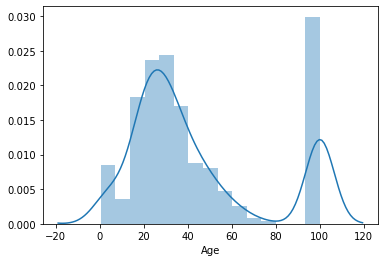

In [6]:
sns.distplot(df['Age'].fillna(100))

#### Gaussian Distributed

Text(0, 0.5, 'No of passenger')

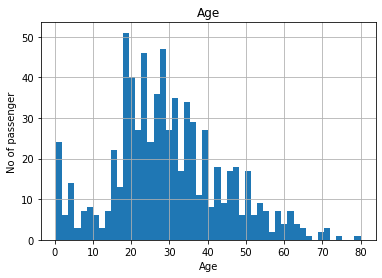

In [7]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

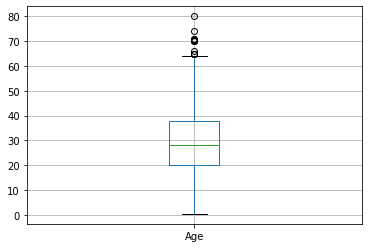

In [12]:
figure=df.boxplot(column="Age")

In [8]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### 1) If The Data Is Normally Distributed We use this

* Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers



In [12]:
uppper_boundary=df['Age'].mean() + 3* df['Age'].std()
lower_boundary=df['Age'].mean() - 3* df['Age'].std()
print(lower_boundary), print(uppper_boundary),print(df['Age'].mean())

-13.880374349943303
73.27860964406094
29.69911764705882


(None, None, None)

* As we got lower_boundary as negative value so we don't have any outliers beyond that because usually we don't have negative age.

#### 2) If Features Are Skewed We Use the below Technique or we can use Z-Score.

###### Note: 
``Z-score`` will work for ``any distributions``. As it doesn't assume data to be Guasian.

Text(0, 0.5, 'No of passenger')

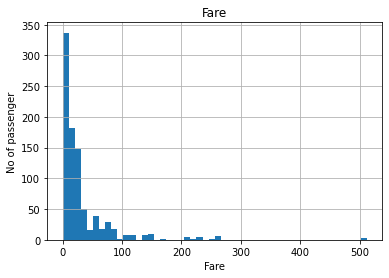

In [13]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

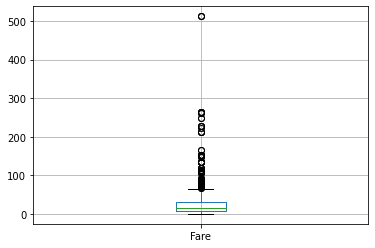

In [14]:
df.boxplot(column="Fare")

In [25]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [26]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR = df['Fare'].quantile(0.75) - df.Fare.quantile(0.25)

In [27]:
#Average outliers
 
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

In [28]:
#### Extreme outliers
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

* As we seen from **boxplot** we conclude that there are ``no outliers`` present below Boxplot. so we ``don't  consider -ve  values``.

In [18]:
data=df.copy()
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
data.loc[data['Age']>=73,'Age'] = 73

In [20]:
data.loc[data['Fare']>=100,'Fare']=100

Text(0, 0.5, 'No of passenger')

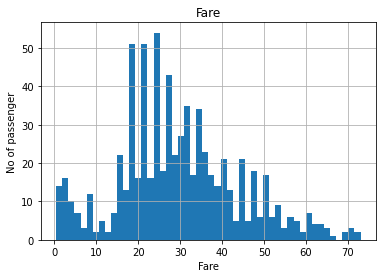

In [21]:
figure=data['Age'].hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

Text(0, 0.5, 'No of passenger')

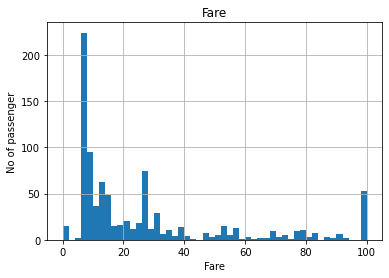

In [22]:
figure=data['Fare'].hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [24]:
### Logistic Regression
sss
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)


In [25]:
from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6567164179104478
roc_auc_score: 0.6794572948419102


In [26]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [27]:
y_pred1
#probablity of 0 and 1.....

array([[0.4979749 , 0.5020251 ],
       [0.68946062, 0.31053938],
       [0.68859412, 0.31140588],
       [0.69041884, 0.30958116],
       [0.72072345, 0.27927655],
       [0.68038199, 0.31961801],
       [0.55614231, 0.44385769],
       [0.34314157, 0.65685843],
       [0.71471766, 0.28528234],
       [0.72473645, 0.27526355],
       [0.68485633, 0.31514367],
       [0.56897675, 0.43102325],
       [0.62365589, 0.37634411],
       [0.35868065, 0.64131935],
       [0.5448299 , 0.4551701 ],
       [0.55430356, 0.44569644],
       [0.66664531, 0.33335469],
       [0.65075376, 0.34924624],
       [0.6082095 , 0.3917905 ],
       [0.63061197, 0.36938803],
       [0.62158976, 0.37841024],
       [0.49278949, 0.50721051],
       [0.46694883, 0.53305117],
       [0.71514809, 0.28485191],
       [0.70681046, 0.29318954],
       [0.6901385 , 0.3098615 ],
       [0.71480695, 0.28519305],
       [0.7208437 , 0.2791563 ],
       [0.78038105, 0.21961895],
       [0.73197585, 0.26802415],
       [0.